# Creating and Backtesting Fibonacci Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


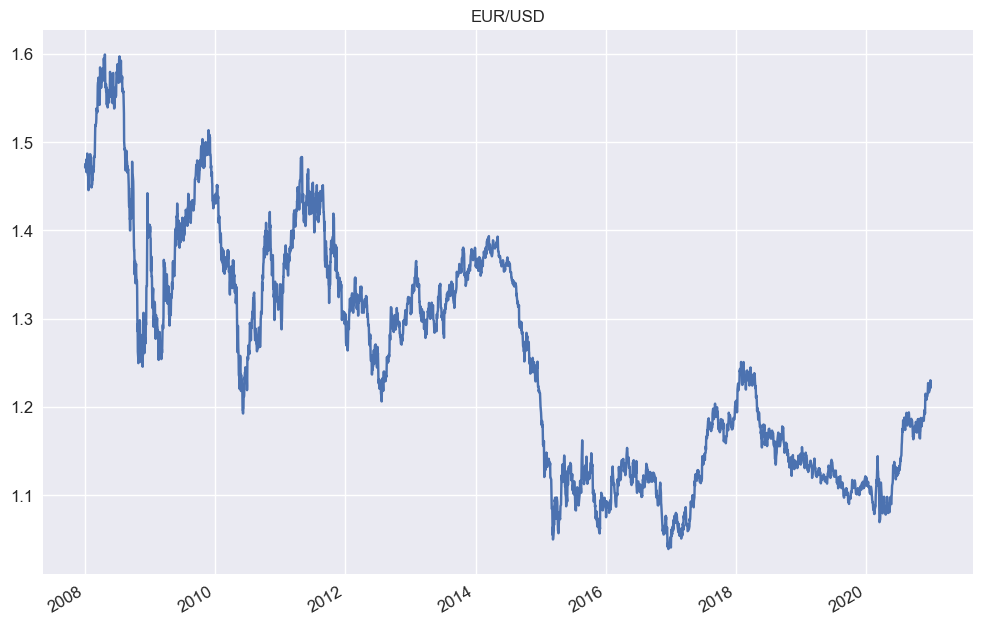

In [4]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## A first Intuition on Fibonacci Retracement (Uptrend)

__Uptrend: Higher Highs and Higher Lows__

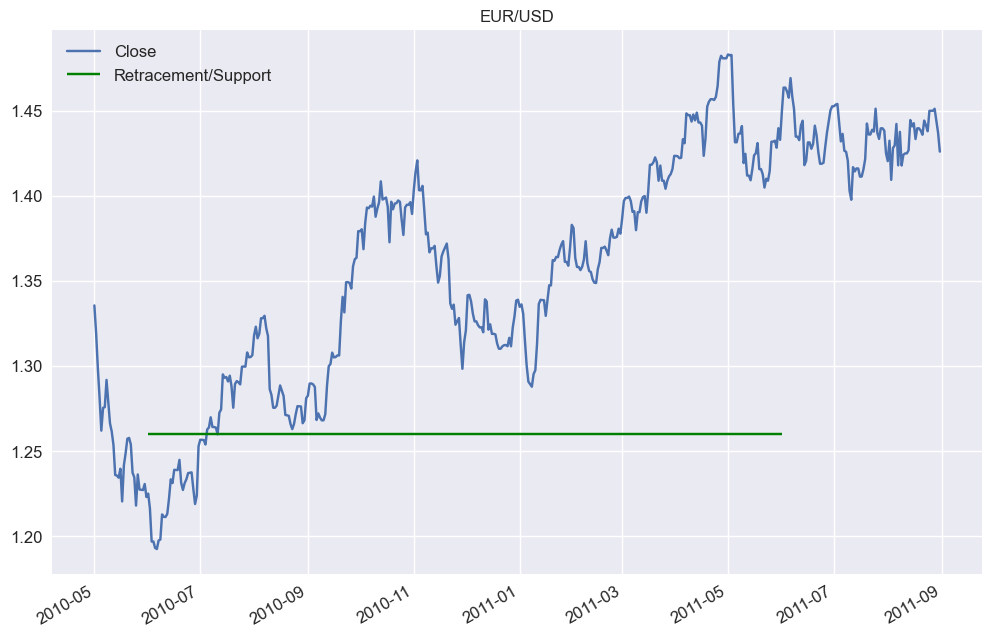

In [5]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Retracement/Support")
plt.legend(fontsize = 12)
plt.show()

__Retracement__: After having reached a Higher High in an Uptrend, the __price temporarily returns (retraces) part way back__ to the previous price level before the Uptrend continues. -> __Support at Retracement Level(s)__

In [6]:
high = data.loc["06-2010":"08-2010", "Close"].max()
high

np.float64(1.32942)

In [7]:
low = data.loc["06-2010":"08-2010", "Close"].min()
low

np.float64(1.19236)

In [8]:
fifty_percent = (low + high)/2
fifty_percent

np.float64(1.26089)

__Fibonacci Levels derived from Fibonacci numbers: 23.6%, 38.2%, 61.8%__

In [9]:
fibonacci1 = 0.236
fibonacci1

0.236

In [10]:
R1 = high - (high-low) * fibonacci1
R1

np.float64(1.2970738400000001)

In [11]:
fibonacci2 = 0.382
fibonacci2

0.382

In [12]:
R2 = high - (high-low) * fibonacci2
R2

np.float64(1.27706308)

In [13]:
fibonacci3 = 0.618
fibonacci3

0.618

In [14]:
R3 = high - (high-low) * fibonacci3
R3

np.float64(1.2447169200000001)

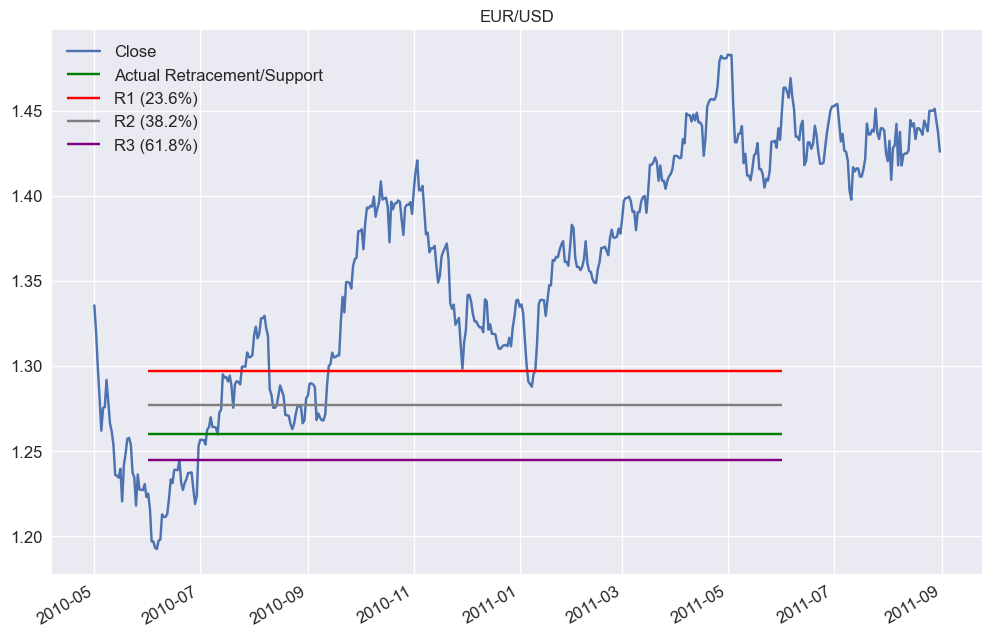

In [15]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Actual Retracement/Support")
plt.hlines(y = R1, xmin = "06-2010", xmax = "06-2011", color = "red", label = "R1 (23.6%)")
plt.hlines(y = R2, xmin = "06-2010", xmax = "06-2011", color = "grey", label = "R2 (38.2%)")
plt.hlines(y = R3, xmin = "06-2010", xmax = "06-2011", color = "purple", label = "R3 (61.8%)")
plt.legend(fontsize = 12)
plt.show()

__Retracement Level Breakout__: If the price breaks through Retracement Level(s), this could indicate a Trend Reversal (Downtrend)

## A first Intuition on Fibonacci Retracement (Downtrend)

__Downtrend: Lower Lows and Lower Highs__

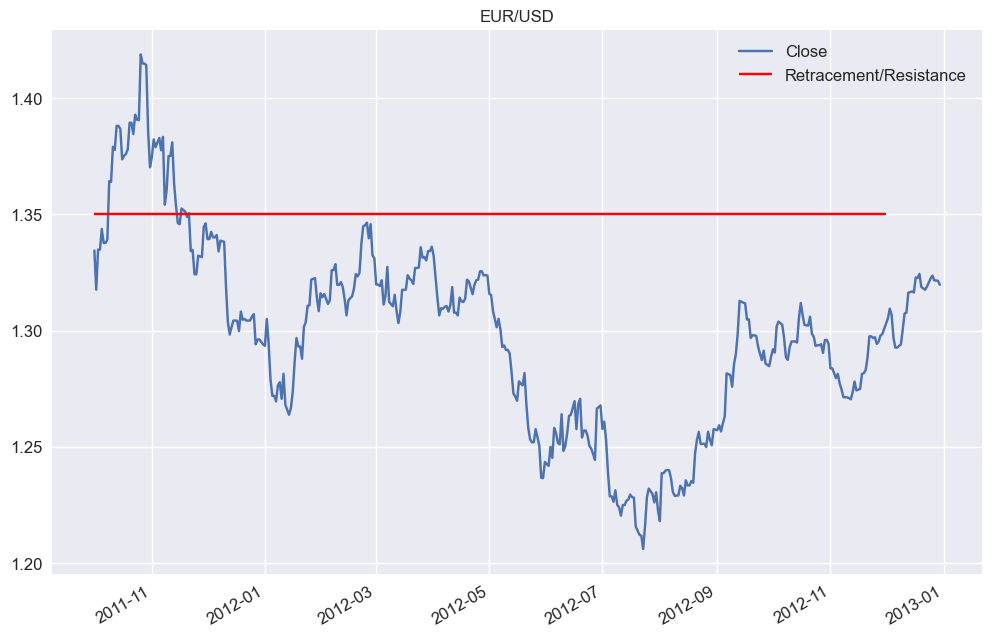

In [16]:
data.loc["10-2011":"12-2012", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.35, xmin = "10-2011", xmax = "12-2012", color = "red", label = "Retracement/Resistance")
plt.legend(fontsize = 12)
plt.show()

__Retracement__: After having reached a Lower Low in an Downtrend, the __price temporarily returns (retraces) part way back__ to the previous price level before the Downtrend continues. -> __Resistance at Retracement Level(s)__

In [17]:
low = data.loc["10-2011":"03-2012", "Close"].min()
low

np.float64(1.26377)

In [18]:
high = data.loc["10-2011":"03-2012", "Close"].max()
high

np.float64(1.41886)

In [19]:
print(fibonacci1, fibonacci2, fibonacci3)

0.236 0.382 0.618


In [20]:
R1 = high - (high-low) * (1-fibonacci1)
R1

np.float64(1.30037124)

In [21]:
R2 = high - (high-low) * (1-fibonacci2)
R2

np.float64(1.32301438)

In [22]:
R3 = high - (high-low) * (1-fibonacci3)
R3

np.float64(1.35961562)

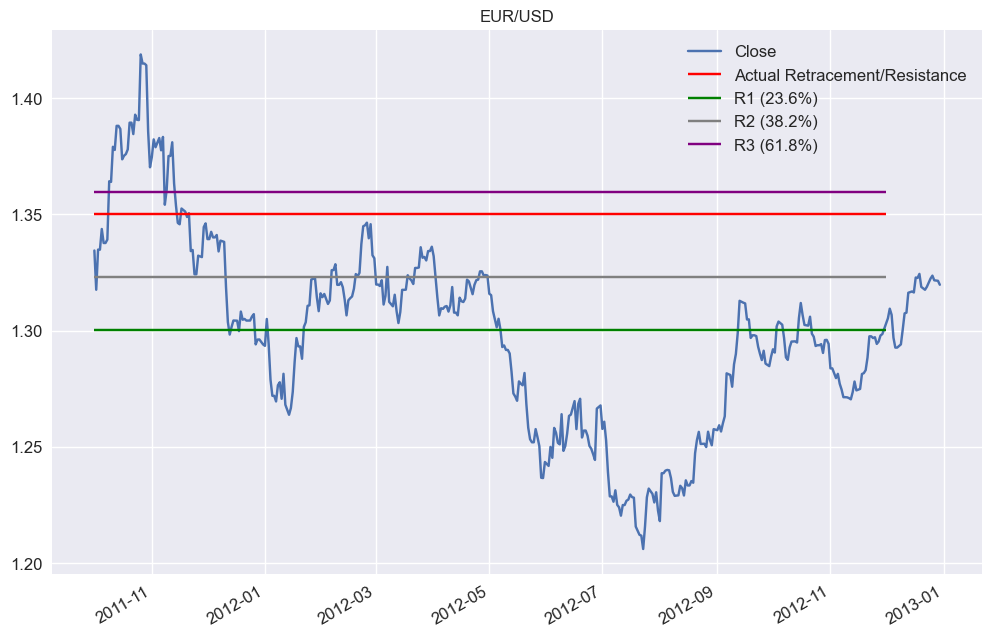

In [23]:
data.loc["10-2011":"12-2012", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.35, xmin = "10-2011", xmax = "12-2012", color = "red", label = "Actual Retracement/Resistance")
plt.hlines(y = R1, xmin = "10-2011", xmax = "12-2012", color = "green", label = "R1 (23.6%)")
plt.hlines(y = R2, xmin = "10-2011", xmax = "12-2012", color = "grey", label = "R2 (38.2%)")
plt.hlines(y = R3, xmin = "10-2011", xmax = "12-2012", color = "purple", label = "R3 (61.8%)")
plt.legend(fontsize = 12)
plt.show()

__Retracement Level Breakout__: If the price breaks through Retracement Level(s), this could indicate a Trend Reversal (Uptrend)

## Identifying Local Highs

In [24]:
from scipy.signal import argrelextrema

In [25]:
hh = data.High.copy()

In [26]:
hh

2008-01-01    1.47502
2008-01-02    1.47812
2008-01-03    1.48254
2008-01-05    1.47559
2008-01-06    1.47560
               ...   
2020-12-23    1.22158
2020-12-27    1.22504
2020-12-28    1.22752
2020-12-29    1.23102
2020-12-30    1.23094
Name: High, Length: 3811, dtype: float64

In [27]:
order = 70 # approx. 3 month

In [28]:
local_max = argrelextrema(hh.values, np.greater_equal, order = order)

In [29]:
local_max

(array([  96,  172,  315,  629,  965, 1143, 1430, 1624, 1747, 2084, 2419,
        2599, 2950, 3065, 3221, 3598, 3809]),)

In [30]:
data.index[local_max]

DatetimeIndex(['2008-04-21', '2008-07-14', '2008-12-17', '2009-11-24',
               '2010-11-03', '2011-05-03', '2012-02-23', '2012-09-16',
               '2013-01-31', '2014-05-07', '2015-08-23', '2016-05-02',
               '2017-09-07', '2018-02-15', '2018-09-23', '2020-03-08',
               '2020-12-29'],
              dtype='datetime64[ns]', freq=None)

In [31]:
data.High.values[local_max]

array([1.60194, 1.60388, 1.47204, 1.5144 , 1.42822, 1.49402, 1.34865,
       1.3172 , 1.3711 , 1.39936, 1.17142, 1.16164, 1.20928, 1.2556 ,
       1.18151, 1.14963, 1.23102])

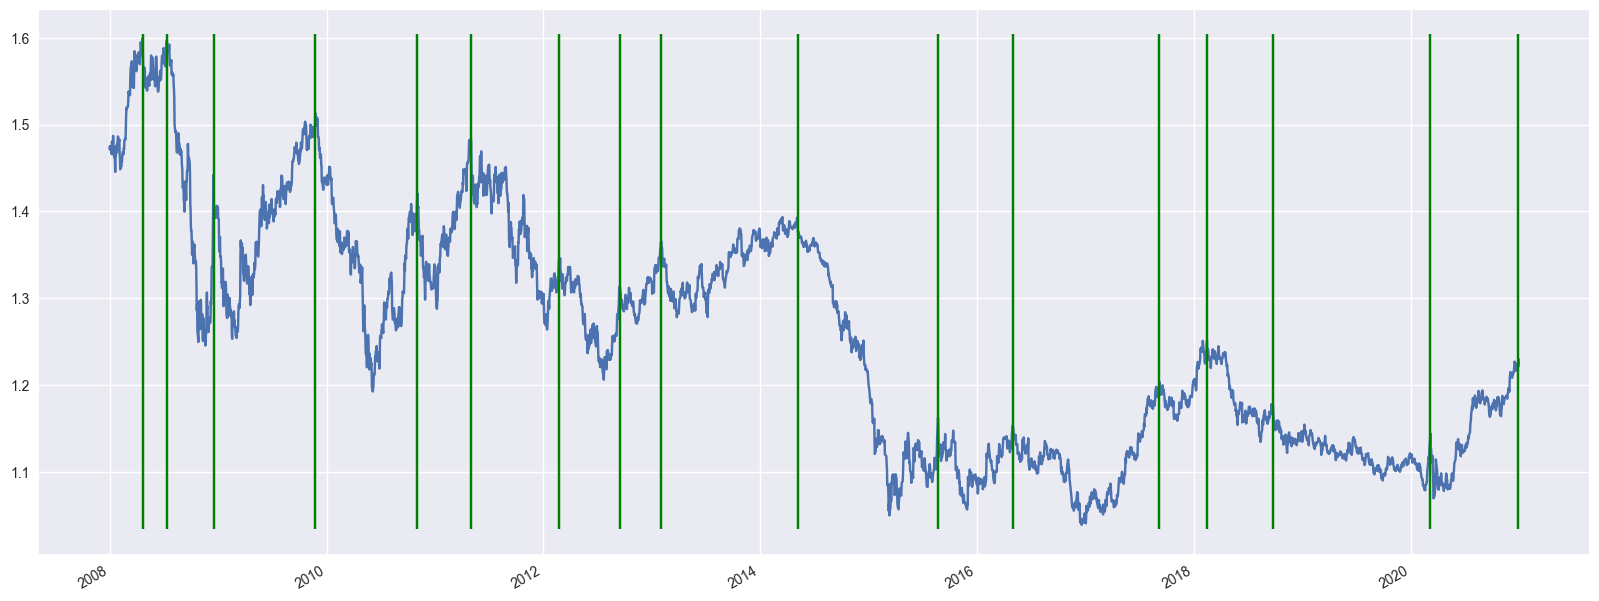

In [32]:
data.Close.plot(figsize = (20, 8))
plt.vlines(x = data.index[local_max], ymin = data.Low.min(), ymax = data.High.max(), color = "g")
plt.show()

## Identifying Local Lows

In [33]:
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [34]:
ll = data.Low.copy()

In [35]:
local_min = argrelextrema(ll.values, np.less_equal, order = order)

In [36]:
local_min

(array([  17,  268,  385,  818, 1028, 1391, 1575, 1799, 2303, 2493, 2637,
        2772, 2994, 3256, 3486, 3608, 3770]),)

In [37]:
data.Low.values[local_min]

array([1.43664, 1.23298, 1.24562, 1.18765, 1.28607, 1.26242, 1.20424,
       1.27453, 1.04624, 1.05237, 1.09117, 1.03406, 1.15539, 1.12155,
       1.08792, 1.0636 , 1.16027])

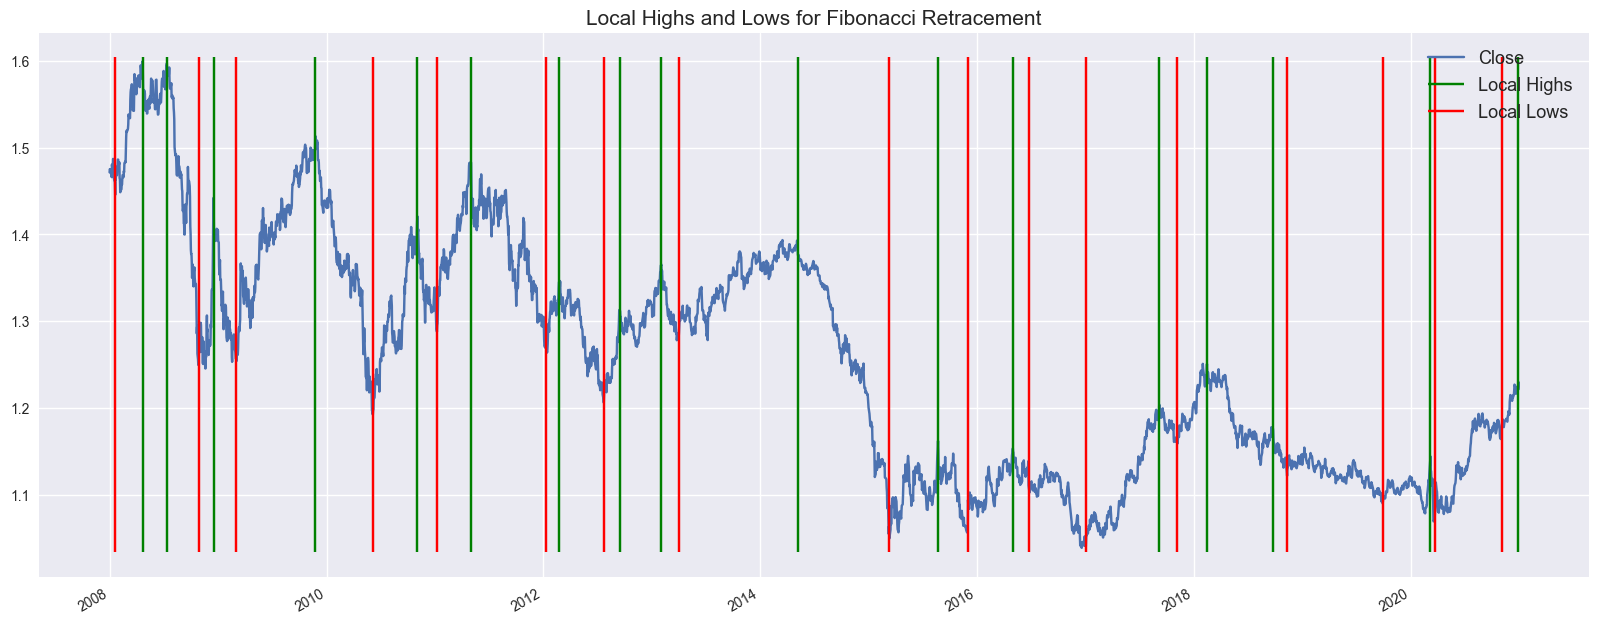

In [38]:
data.Close.plot(figsize = (20, 8))
plt.vlines(x = data.index[local_max], ymin = data.Low.min(), ymax = data.High.max(), color = "g", label = "Local Highs")
plt.vlines(x = data.index[local_min], ymin = data.Low.min(), ymax = data.High.max(), color = "r", label = "Local Lows")
plt.title("Local Highs and Lows for Fibonacci Retracement", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

## High and Lows - an iterative approach

__Highs__

In [39]:
data["hh"] = np.nan
data["hh_date"] = np.nan

In [40]:
data

,Open,High,Low,Close,hh,hh_date
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN
...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,NaN,NaN
2020-12-27,1.21892,1.22504,1.21812,1.22152,NaN,NaN
2020-12-28,1.22145,1.22752,1.22086,1.22502,NaN,NaN
2020-12-29,1.22508,1.23102,1.22495,1.23000,NaN,NaN


In [41]:
for bar in range(len(data)): # iterating over the bars
    date = data.index[bar] # determine the current bar´s date
    hh = data.iloc[:bar+1].High # get the high column until current bar
    
    # determine all local highs until current bar
    local_max = argrelextrema(hh.values, np.greater_equal, order = order) 
    
    # determine the most recent local high (price) and add to "hh" column
    data.loc[date, "hh"] = data.High.values[local_max][-1] 
    
    # determine the most recent local high (date) and add to "hh_date" column
    data.loc[date, "hh_date"] = data.index[local_max][-1]  

C:\Users\agtbe\AppData\Local\Temp\ipykernel_20552\2868572730.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2008-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[date, "hh_date"] = data.index[local_max][-1]


__Lows__

In [42]:
data["ll"] = np.nan
data["ll_date"] = np.nan

In [43]:
for bar in range(len(data)): # iterating over the bars
    date = data.index[bar] # determine the current bar´s date
    ll = data.iloc[:bar+1].Low # get the high column until current bar
    
    # determine all local lows until current bar
    local_min = argrelextrema(ll.values, np.less_equal, order = order)
    
    # determine the most recent local low (price) and add to "ll" column
    data.loc[date, "ll"] = data.Low.values[local_min][-1]
    
    # determine the most recent local low (date) and add to "ll_date" column
    data.loc[date, "ll_date"] = data.index[local_min][-1]

C:\Users\agtbe\AppData\Local\Temp\ipykernel_20552\720649991.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2008-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[date, "ll_date"] = data.index[local_min][-1]


In [44]:
data

,Open,High,Low,Close,hh,hh_date,ll,ll_date
2008-01-01,1.45905,1.47502,1.45885,1.47146,1.47502,2008-01-01 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-02,1.47146,1.47812,1.46876,1.47510,1.47812,2008-01-02 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-03,1.47504,1.48254,1.46958,1.47429,1.48254,2008-01-03 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-05,1.47451,1.47559,1.47430,1.47465,1.48254,2008-01-03 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-06,1.47465,1.47560,1.46586,1.46954,1.48254,2008-01-03 00:00:00,1.45885,2008-01-01 00:00:00
...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.22728,2020-12-16 00:00:00,1.16027,2020-11-03 00:00:00
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.22728,2020-12-16 00:00:00,1.16027,2020-11-03 00:00:00
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.22752,2020-12-28 00:00:00,1.16027,2020-11-03 00:00:00
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.23102,2020-12-29 00:00:00,1.16027,2020-11-03 00:00:00


## Identifying Trends (Uptrend / Downtrend)

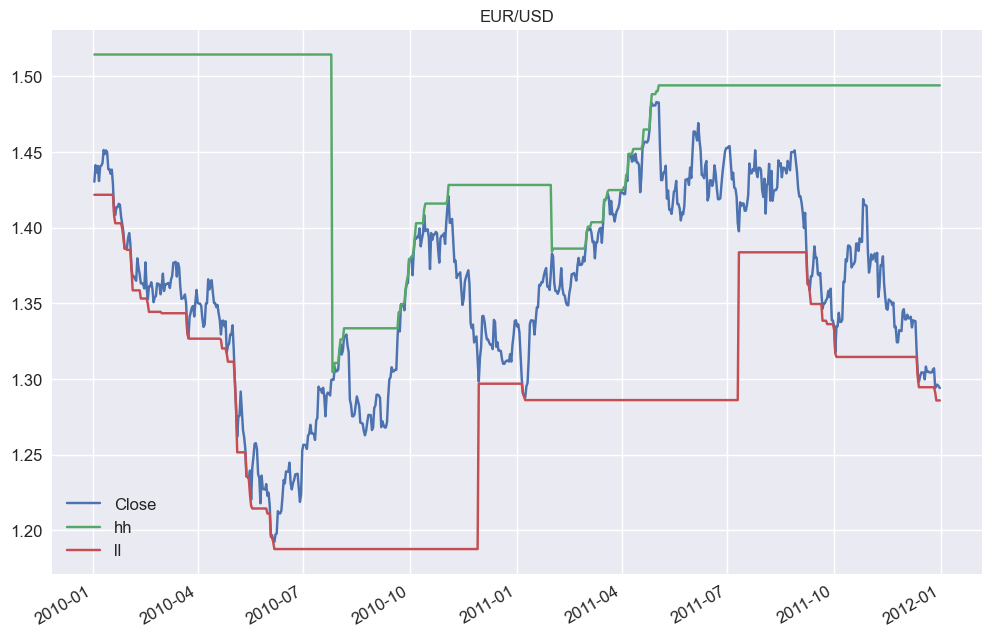

In [45]:
data.loc["2010":"2011", ["Close", "hh", "ll"]].plot(figsize = (12, 8), title = "EUR/USD",
                                                    fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

__Downtrend__: Most recent lower low is more recent than the most recent higher high <br>
__Uptrend__: Most recent higher high is more recent than the most recent lower low

In [46]:
data["Trend"] = np.where(data.hh_date > data.ll_date, 1, -1)

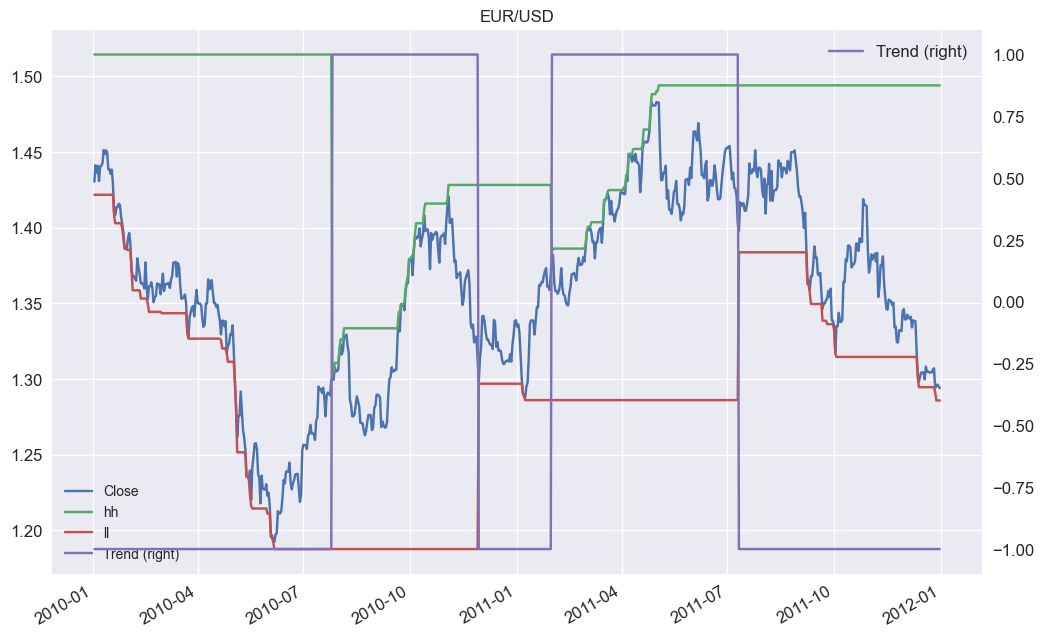

In [47]:
data.loc["2010":"2011", ["Close", "hh", "ll", "Trend"]].plot(figsize = (12, 8), title = "EUR/USD",
                                                             fontsize = 12, secondary_y = "Trend")
plt.legend(fontsize = 12)
plt.show()

In [48]:
data["Trend"] = np.where(data.hh_date > data.ll_date, "Up", "Down")

In [49]:
data.drop(columns = ["hh_date", "ll_date"], inplace = True)

In [50]:
data.Trend.value_counts()

Trend
Down    2032
Up      1779
Name: count, dtype: int64

## Adding Fibonacci Retracement Levels

__Fibonacci Levels derived from Fibonacci numbers: 23.6%, 38.2%, (61.8%)__

In [51]:
data["R23.6"] = np.where(data.Trend == "Up", data.hh - (data.hh-data.ll) * 0.236, data.hh - (data.hh-data.ll) * (1-0.236))

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
 4   hh      3811 non-null   float64
 5   ll      3811 non-null   float64
 6   Trend   3811 non-null   object 
 7   R23.6   3811 non-null   float64
dtypes: float64(7), object(1)
memory usage: 397.0+ KB


In [53]:
data["R38.2"] = np.where(data.Trend == "Up", data.hh - (data.hh-data.ll) * 0.382, data.hh - (data.hh-data.ll) * (1-0.382))

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
 4   hh      3811 non-null   float64
 5   ll      3811 non-null   float64
 6   Trend   3811 non-null   object 
 7   R23.6   3811 non-null   float64
 8   R38.2   3811 non-null   float64
dtypes: float64(8), object(1)
memory usage: 426.8+ KB
